<a href="https://colab.research.google.com/github/msdokania/Habitability-Prediction-of-Exoplanets/blob/main/CSE575_KMeans_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
full_data = pd.read_csv("/content/drive/My Drive/Datasets/PHL_dataset.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
full_data.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 112 entries, P_NAME to P_SEMI_MAJOR_AXIS_EST
dtypes: float64(94), int64(4), object(14)
memory usage: 3.5+ MB


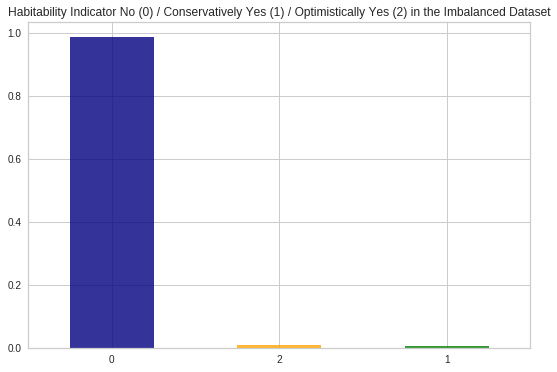

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (9,6))
full_data.P_HABITABLE.value_counts(normalize = True, ascending = False).plot(kind='bar', color= ['navy','orange','green'], alpha = 0.8, rot=0)
plt.title('Habitability Indicator No (0) / Conservatively Yes (1) / Optimistically Yes (2) in the Imbalanced Dataset')
plt.show()

In [ ]:
full_data['P_HABITABLE'].value_counts(normalize=True)

0    0.986413
2    0.008399
1    0.005188
Name: P_HABITABLE, dtype: float64

In [ ]:
!pip install dabl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.6.2-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.4 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 2.2.3
    Uninstalling matplotlib-2.2.3:
      Successfully uninstalled matplotlib-2.2.3


In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function() {
    return False;
}

<IPython.core.display.Javascript object>

In [ ]:
!pip install matplotlib==2.2.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-2.2.3-cp38-cp38-linux_x86_64.whl
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.8.0 requires matplotlib>=3.1.1, but you have matplotlib 2.2.3 which is incompatible.
mizani 0.7.3 requires matplotlib>=3.1.1, but you have matplotlib 2.2.3 which is incompatible.
datascience 0.17.5 requires matplotlib>=3.0.0, but you have matplotlib 2.2.3 which is incompatible.
dabl 0.2.4 requires matplotlib>=3.4, but you have matplotlib 2.2.3 which is incompatible.
arviz 0.12.1 requires matplotlib>=3.0, but you have matplotlib 2.2.3 which is incompatible.


In [ ]:
#import dabl
#import warnings
#import matplotlib.pyplot as plt
#warnings.filterwarnings('ignore')
#dabl.plot(full_data, target_col = 'P_HABITABLE')

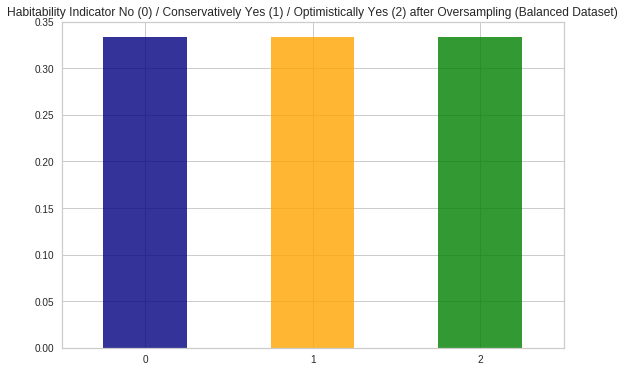

In [ ]:
from sklearn.utils import resample

no = full_data[full_data.P_HABITABLE == 0]
yes_cons = full_data[full_data.P_HABITABLE == 1]
yes_opti = full_data[full_data.P_HABITABLE == 2]
yes_cons_oversampled = resample(yes_cons, replace=True, n_samples=len(no), random_state=12345)
oversampled = pd.concat([no, yes_cons_oversampled])
yes_opti_oversampled = resample(yes_opti, replace=True, n_samples=len(no), random_state=12345)
oversampled = pd.concat([oversampled, yes_opti_oversampled])

fig = plt.figure(figsize = (9,6))
oversampled.P_HABITABLE.value_counts(normalize = True, ascending = False).plot(kind='bar', color= ['navy','orange','green'], alpha = 0.8, rot=0)
plt.title('Habitability Indicator No (0) / Conservatively Yes (1) / Optimistically Yes (2) after Oversampling (Balanced Dataset)')
plt.show()

In [ ]:
oversampled['P_HABITABLE'].value_counts(normalize=True)

0    0.333333
1    0.333333
2    0.333333
Name: P_HABITABLE, dtype: float64

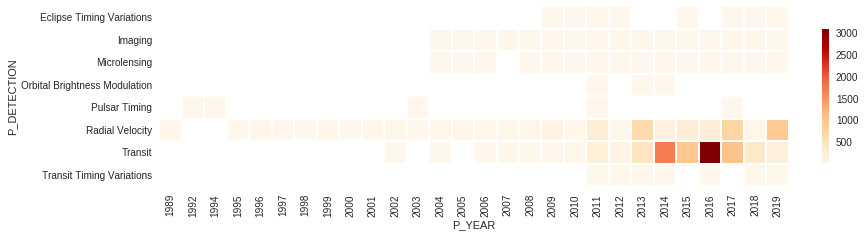

In [ ]:
by_p_detec = (oversampled
            .groupby('P_DETECTION')
            .filter(lambda x : len(x) > 5)
            .groupby(['P_DETECTION', 'P_YEAR'])
            .size()
            .unstack()
           )
import seaborn as sns
plt.figure(figsize=(12,12))
g = sns.heatmap(
    by_p_detec, 
    square=True, 
    cbar_kws={'fraction' : 0.01}, 
    cmap='OrRd',
    linewidth=1
)

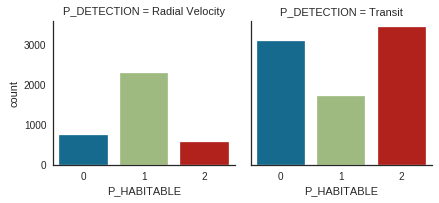

In [ ]:
import seaborn as sns
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="P_HABITABLE", col="P_DETECTION", col_wrap=3, data=oversampled[oversampled['P_DETECTION'].isin(['Radial Velocity','Transit'])], kind="count", height=3.0, aspect=1.0)

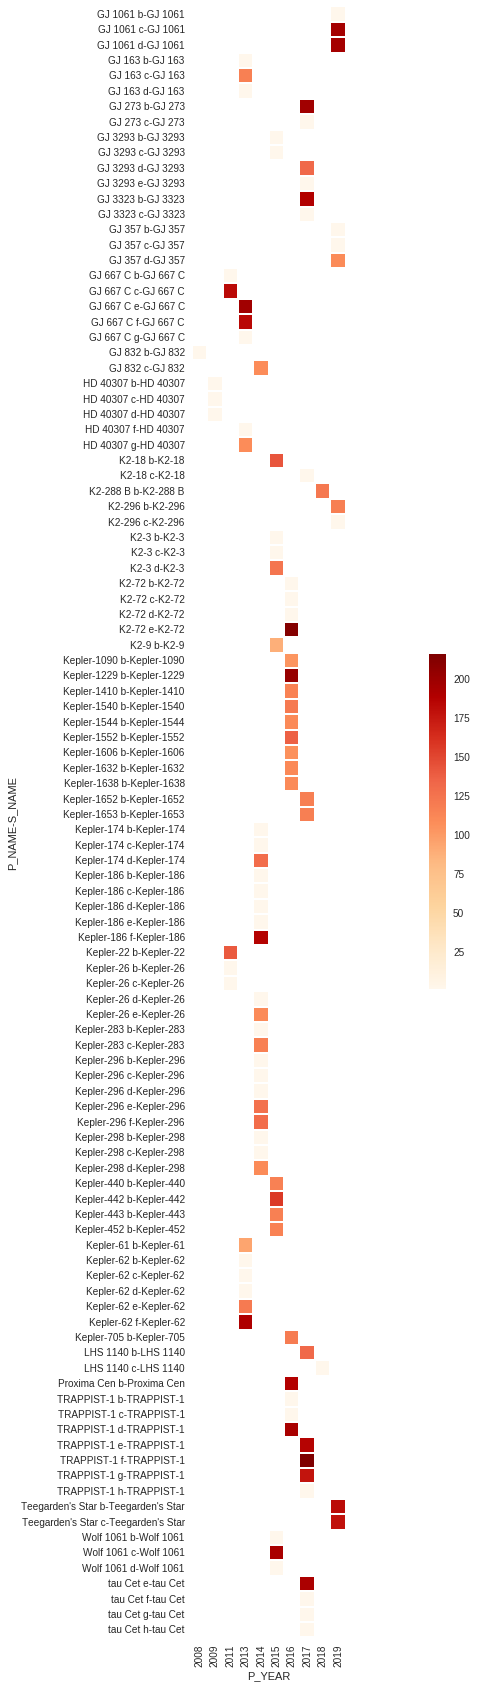

In [ ]:
by_p_s_name = (oversampled
            .groupby('S_NAME')
            .filter(lambda x : len(x) > 10)
            .groupby(['P_NAME', 'S_NAME','P_YEAR'])
            .size()
            .unstack()
           )

plt.figure(figsize=(30,30))
g = sns.heatmap(
    by_p_s_name, 
    square=True, 
    cbar_kws={'fraction' : 0.01}, 
    cmap='OrRd', 
    linewidth=1 
)

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

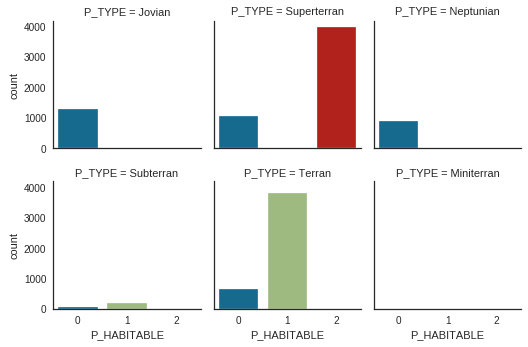

In [ ]:
import seaborn as sns
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="P_HABITABLE", col="P_TYPE", col_wrap=3, data=oversampled, kind="count", height=2.5, aspect=1.0)

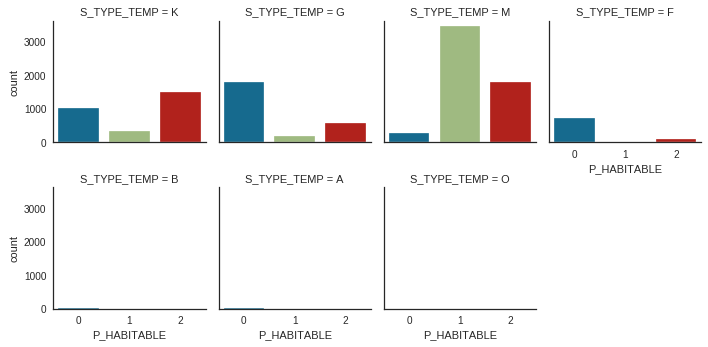

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="P_HABITABLE", col="S_TYPE_TEMP", col_wrap=4, data=oversampled, kind="count", height=2.5, aspect=1.0)

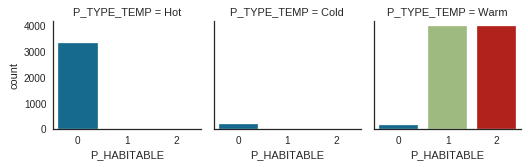

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="P_HABITABLE", col="P_TYPE_TEMP", col_wrap=3, data=oversampled, kind="count", height=2.5, aspect=1.0)

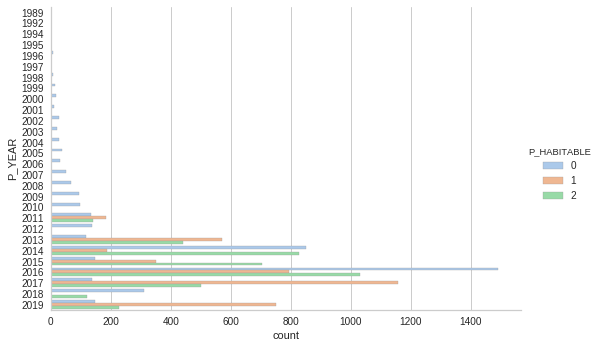

In [ ]:
sns.catplot(y="P_YEAR", hue="P_HABITABLE", kind="count",
            palette="pastel", edgecolor=".6",
            data=oversampled, aspect=1.5)

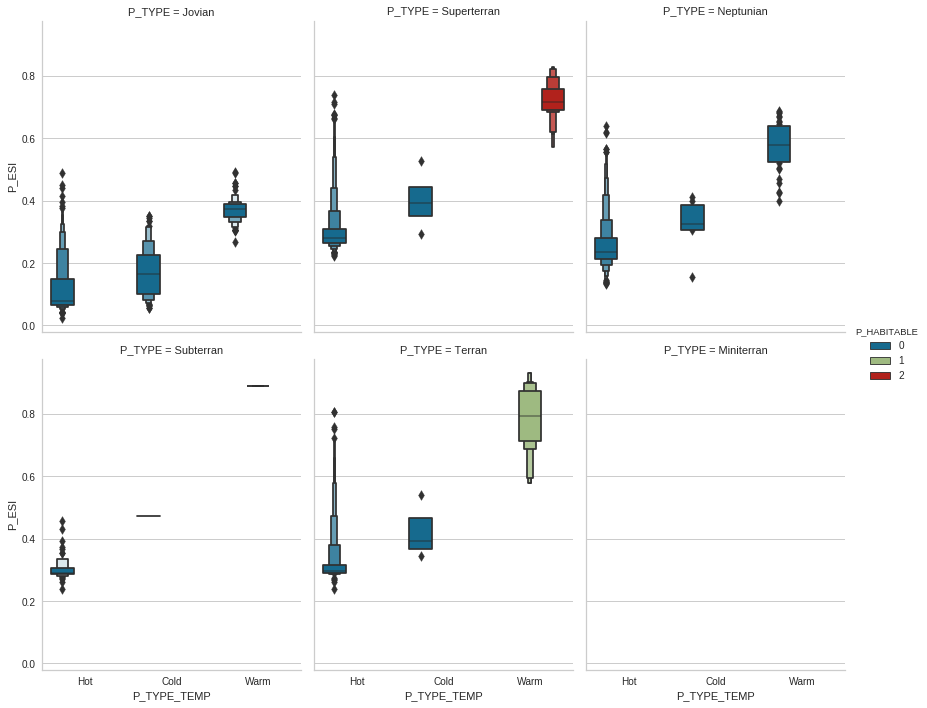

In [ ]:
sns.catplot(x="P_TYPE_TEMP", y="P_ESI", hue="P_HABITABLE",
            col="P_TYPE", col_wrap=3, aspect=0.8,
            kind="boxen", data=oversampled)

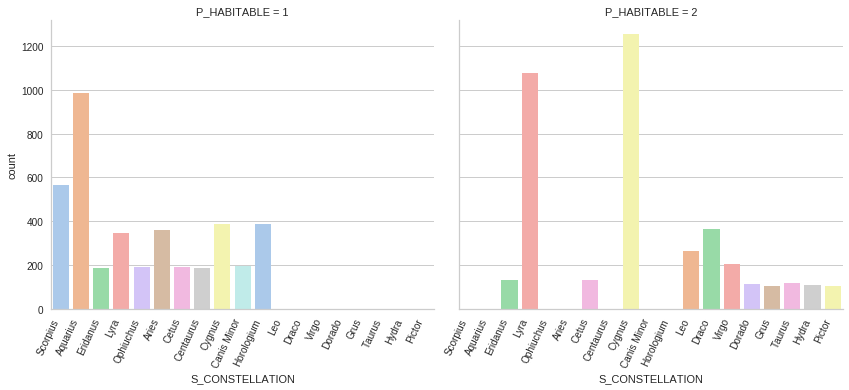

In [ ]:
label_size = 10
plt.rcParams['xtick.labelsize'] = label_size 
chart = sns.catplot(
    data=oversampled[oversampled['P_HABITABLE'].isin([1,2])],
    x='S_CONSTELLATION',
    kind='count',
    palette='pastel',
    col='P_HABITABLE',
    aspect=1.2,
)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

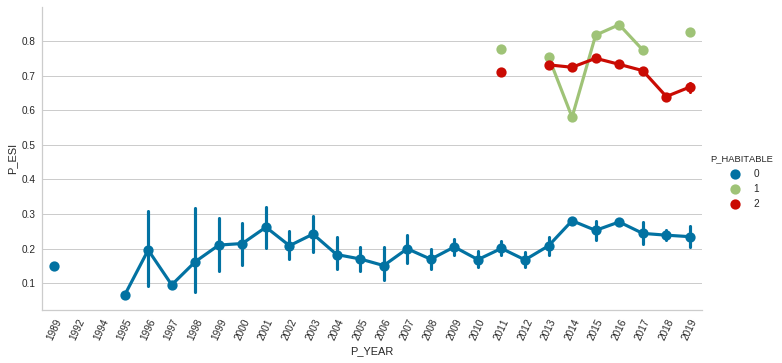

In [ ]:
p_plot = sns.catplot(x="P_YEAR", y="P_ESI", hue="P_HABITABLE", kind="point", data=oversampled, aspect=2.0)
p_plot.set_xticklabels(rotation=65)

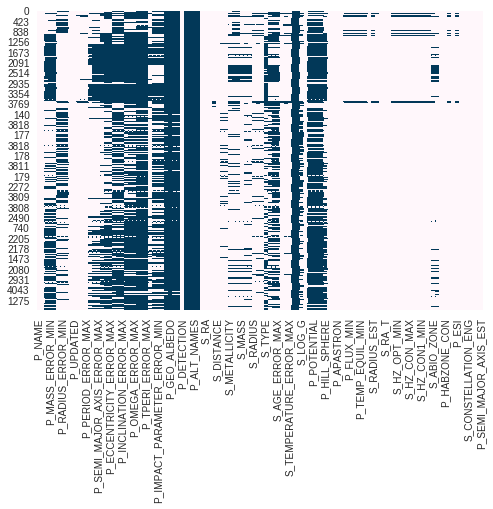

In [ ]:
# Missing Data Pattern in Training Data
import seaborn as sns
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')

In [ ]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(50)

,Total,Percent
P_ALT_NAMES,11979,1.000000
P_GEO_ALBEDO,11979,1.000000
S_DISC,11979,1.000000
P_ATMOSPHERE,11979,1.000000
S_MAGNETIC_FIELD,11979,1.000000
P_DETECTION_MASS,11979,1.000000
P_DETECTION_RADIUS,11979,1.000000
P_GEO_ALBEDO_ERROR_MAX,11469,0.957425
P_GEO_ALBEDO_ERROR_MIN,11469,0.957425
P_TEMP_MEASURED,11469,0.957425


In [ ]:
compact_data = oversampled.drop(['P_GEO_ALBEDO', 'P_DETECTION_MASS', 'P_DETECTION_RADIUS', 'P_ALT_NAMES', 'P_ATMOSPHERE', 'S_DISC', 'S_MAGNETIC_FIELD', 
                 'P_TEMP_MEASURED', 'P_GEO_ALBEDO_ERROR_MIN', 'P_GEO_ALBEDO_ERROR_MAX', 'P_TPERI_ERROR_MAX', 'P_TPERI_ERROR_MIN', 'P_TPERI', 
                 'P_DENSITY', 'P_ESCAPE', 'P_GRAVITY', 'P_POTENTIAL', 'P_OMEGA_ERROR_MAX', 'P_OMEGA_ERROR_MIN', 'P_OMEGA', 'P_INCLINATION_ERROR_MAX', 
                 'P_INCLINATION_ERROR_MIN', 'P_INCLINATION', 'P_ECCENTRICITY_ERROR_MAX', 'P_ECCENTRICITY_ERROR_MIN', 'S_AGE_ERROR_MIN', 'S_AGE_ERROR_MAX', 
                 'P_IMPACT_PARAMETER_ERROR_MIN', 'P_IMPACT_PARAMETER_ERROR_MAX', 'P_IMPACT_PARAMETER', 'P_MASS_ERROR_MAX', 'P_MASS_ERROR_MIN', 'P_HILL_SPHERE', 
                 'P_MASS'], axis = 1) 

In [ ]:
compact_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11979 entries, 0 to 2205
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   P_NAME                       11979 non-null  object 
 1   P_STATUS                     11979 non-null  float64
 2   P_RADIUS                     8239 non-null   float64
 3   P_RADIUS_ERROR_MIN           8205 non-null   float64
 4   P_RADIUS_ERROR_MAX           8205 non-null   float64
 5   P_YEAR                       11979 non-null  int64  
 6   P_UPDATED                    11979 non-null  object 
 7   P_PERIOD                     11869 non-null  float64
 8   P_PERIOD_ERROR_MIN           11738 non-null  float64
 9   P_PERIOD_ERROR_MAX           11738 non-null  float64
 10  P_SEMI_MAJOR_AXIS            8981 non-null   float64
 11  P_SEMI_MAJOR_AXIS_ERROR_MIN  7716 non-null   float64
 12  P_SEMI_MAJOR_AXIS_ERROR_MAX  7717 non-null   float64
 13  P_ECCENTRICITY   

In [ ]:
compact_data.select_dtypes(include=['object']).columns

Index(['P_NAME', 'P_UPDATED', 'P_DETECTION', 'S_NAME', 'S_TYPE', 'S_ALT_NAMES',
       'P_TYPE', 'S_TYPE_TEMP', 'S_RA_T', 'S_DEC_T', 'P_TYPE_TEMP',
       'S_CONSTELLATION', 'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG'],
      dtype='object')

In [ ]:
compact_data_obj = compact_data.select_dtypes(include=['object'])

In [ ]:
total = compact_data_obj.isnull().sum().sort_values(ascending=False)
percent = (compact_data_obj.isnull().sum()/compact_data_obj.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
S_TYPE,5853,0.488605
P_TYPE_TEMP,327,0.027298
S_TYPE_TEMP,136,0.011353
P_TYPE,17,0.001419
P_NAME,0,0.000000


In [ ]:
compact_data['S_TYPE'] = compact_data['S_TYPE'].fillna(compact_data['S_TYPE'].mode()[0])
compact_data['P_TYPE_TEMP'] = compact_data['P_TYPE_TEMP'].fillna(compact_data['P_TYPE_TEMP'].mode()[0])
compact_data['S_TYPE_TEMP'] = compact_data['S_TYPE_TEMP'].fillna(compact_data['S_TYPE_TEMP'].mode()[0])
compact_data['P_TYPE'] = compact_data['P_TYPE'].fillna(compact_data['P_TYPE'].mode()[0])

In [ ]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in compact_data.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    compact_data[col] = lencoders[col].fit_transform(compact_data[col])

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = compact_data.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(compact_data)

In [ ]:
MiceImputed.head()

,P_NAME,P_STATUS,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,0.0,3.0,2.723031,-0.238321,0.310348,2007.0,0.0,326.03000,-0.32,0.32,...,0.0,1.0,0.0,0.083813,24.0,24.0,5.0,12.082709,6165.86330,1.29
1,1.0,3.0,2.723031,-0.238321,0.310348,2009.0,146.0,516.21997,-3.20,3.20,...,0.0,1.0,0.0,0.082414,83.0,83.0,42.0,12.229641,4684.78480,1.53
2,2.0,3.0,2.723031,-0.238321,0.310348,2008.0,0.0,185.84000,-0.23,0.23,...,0.0,1.0,0.0,0.081917,0.0,0.0,2.0,12.848516,1525.57440,0.83
3,3.0,3.0,2.723031,-0.238321,0.310348,2002.0,146.0,1773.40000,-2.50,2.50,...,0.0,0.0,0.0,0.145241,39.0,39.0,34.0,12.865261,1481.07850,2.93
4,4.0,3.0,2.723031,-0.238321,0.310348,1996.0,146.0,798.50000,-1.00,1.00,...,1.0,2.0,0.0,0.368627,30.0,30.0,75.0,13.421749,565.73385,1.66


In [ ]:
MiceImputed.isna().sum(axis = 0)

P_NAME                   0
P_STATUS                 0
P_RADIUS                 0
P_RADIUS_ERROR_MIN       0
P_RADIUS_ERROR_MAX       0
                        ..
S_CONSTELLATION_ABR      0
S_CONSTELLATION_ENG      0
P_RADIUS_EST             0
P_MASS_EST               0
P_SEMI_MAJOR_AXIS_EST    0
Length: 78, dtype: int64

In [ ]:
#Drop perfectly correlated features
working_data = MiceImputed.drop(['S_NAME', 'P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_DISTANCE', 'P_PERIASTRON', 'P_APASTRON', 
                                 'P_DISTANCE_EFF', 'P_FLUX_MIN', 'P_FLUX_MAX', 'P_TEMP_EQUIL', 'P_TEMP_EQUIL_MIN', 'P_TEMP_EQUIL_MAX', 
                                 'S_RADIUS_EST', 'S_RA_H', 'S_RA_T', 'S_LUMINOSITY', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 
                                 'S_HZ_CON_MAX', 'S_HZ_CON0_MIN', 'S_HZ_CON0_MAX', 'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX', 'S_SNOW_LINE', 
                                'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX', 'S_MAG', 'S_DISTANCE_ERROR_MIN', 'S_DISTANCE_ERROR_MAX', 
                                 'S_METALLICITY', 'S_METALLICITY_ERROR_MIN', 'S_METALLICITY_ERROR_MAX', 'S_AGE', 'S_TEMPERATURE_ERROR_MIN', 
                                 'S_TEMPERATURE_ERROR_MAX', 'S_ABIO_ZONE', 'P_ESI', 'S_CONSTELLATION_ABR', 'P_SEMI_MAJOR_AXIS_EST'], axis=1)

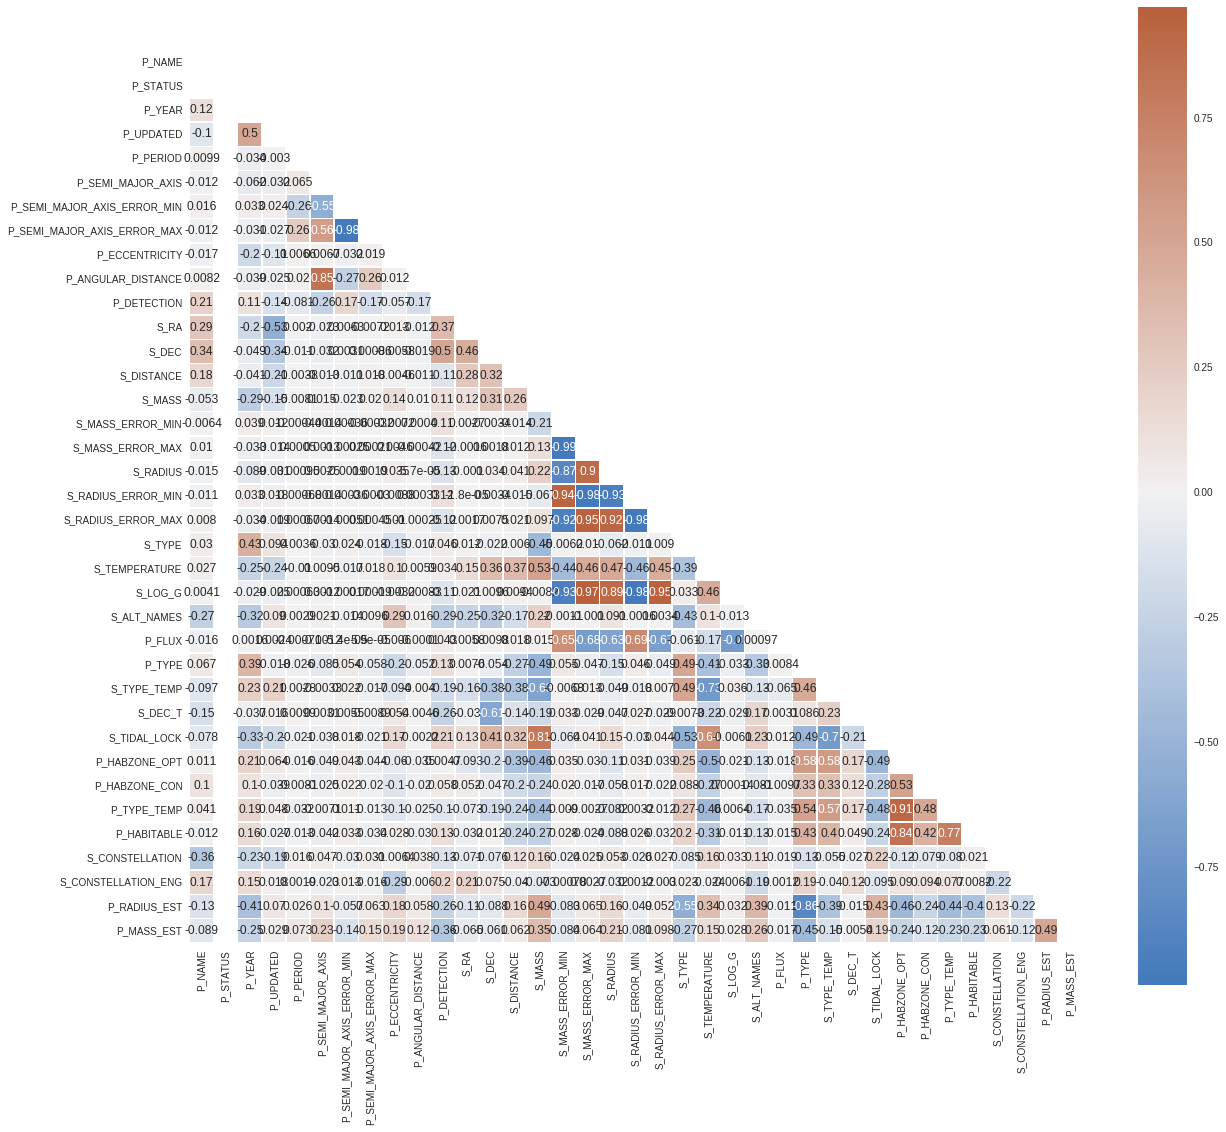

In [ ]:
# Correlation Heatmap for reduced working data set
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = working_data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": 0.9})

In [ ]:
working_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11979 entries, 0 to 2205
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   P_NAME                       11979 non-null  float64
 1   P_STATUS                     11979 non-null  float64
 2   P_YEAR                       11979 non-null  float64
 3   P_UPDATED                    11979 non-null  float64
 4   P_PERIOD                     11979 non-null  float64
 5   P_SEMI_MAJOR_AXIS            11979 non-null  float64
 6   P_SEMI_MAJOR_AXIS_ERROR_MIN  11979 non-null  float64
 7   P_SEMI_MAJOR_AXIS_ERROR_MAX  11979 non-null  float64
 8   P_ECCENTRICITY               11979 non-null  float64
 9   P_ANGULAR_DISTANCE           11979 non-null  float64
 10  P_DETECTION                  11979 non-null  float64
 11  S_RA                         11979 non-null  float64
 12  S_DEC                        11979 non-null  float64
 13  S_DISTANCE       

In [ ]:
# Detecting outliers with IQR
Q1 = working_data.quantile(0.25)
Q3 = working_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

P_NAME                         2150.000000
P_STATUS                          0.000000
P_YEAR                            3.000000
P_UPDATED                        90.000000
P_PERIOD                        101.914721
P_SEMI_MAJOR_AXIS                 0.198560
P_SEMI_MAJOR_AXIS_ERROR_MIN       0.094715
P_SEMI_MAJOR_AXIS_ERROR_MAX       0.101550
P_ECCENTRICITY                    0.045047
P_ANGULAR_DISTANCE               58.917636
P_DETECTION                       1.000000
S_RA                            122.166550
S_DEC                            54.138227
S_DISTANCE                      481.440000
S_MASS                            0.520000
S_MASS_ERROR_MIN                  0.050000
S_MASS_ERROR_MAX                  0.050000
S_RADIUS                          0.540000
S_RADIUS_ERROR_MIN                0.060547
S_RADIUS_ERROR_MAX                0.087495
S_TYPE                            0.000000
S_TEMPERATURE                  1997.530000
S_LOG_G                           0.413547
S_ALT_NAMES

In [ ]:
# Removing outliers from dataset
working_data = working_data[~((working_data < (Q1 - 1.5 * IQR)) |(working_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
features = working_data[['P_TYPE_TEMP','P_PERIOD','S_DEC','S_DISTANCE','S_MASS','S_TEMPERATURE','P_TYPE','S_TIDAL_LOCK','P_HABZONE_OPT','P_RADIUS_EST']]
target = working_data['P_HABITABLE']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=12345)

# Normalize Features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
working_data_unsup = working_data.drop(['P_HABITABLE'], axis=1)

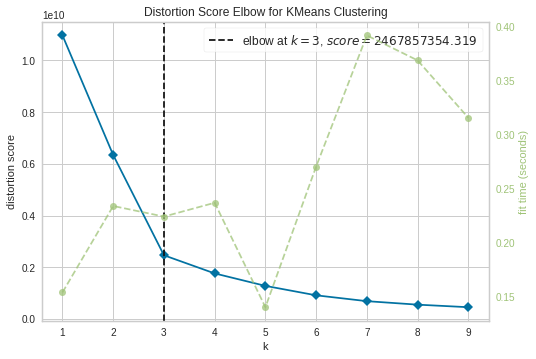

In [ ]:
#Plotting Elbow Curve
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(working_data_unsup)    
visualizer.poof()

In [ ]:
#Fitting data into K-Means model with 3 clusters
km_3 = KMeans(n_clusters=3,random_state=12345)
km_3.fit(working_data_unsup)
print(km_3.cluster_centers_)

[[ 3.81383613e+03  3.00000000e+00  2.01674710e+03  9.19806452e+01
   7.88926369e+00  3.22010153e-02 -1.24225887e-03  1.25776779e-03
   6.97304973e-02  2.78896680e+00  8.00000000e+00  3.46540862e+02
  -4.97546749e+00  1.26075097e+01  8.05290323e-02 -1.00258065e-02
   1.00258065e-02  1.20438710e-01 -3.87096774e-05  3.87096774e-05
   1.75000000e+02  2.56038323e+03  4.25714121e+00  0.00000000e+00
   6.60403957e-01  4.49806452e+00  5.00000000e+00  2.31696774e+03
   1.98994425e-01  9.94838710e-01  7.45806452e-01  1.99354839e+00
   3.06193548e+00  8.29561290e+01  9.67574877e-01  7.56106855e-01]
 [ 4.83015287e+02  3.00000000e+00  2.01337197e+03  3.19477707e+01
   3.79453061e+01  1.48131928e-01 -1.62179813e-02  1.34484714e-02
   4.76915141e-02  1.80322161e+01  7.28025478e+00  2.80699394e+02
  -2.78250489e+01  2.44037707e+01  3.14840764e-01 -3.94140127e-02
   3.66751592e-02  6.82227540e-01 -6.65080291e-02  8.59043140e-02
   1.75000000e+02  3.35715803e+03  4.57192018e+00  0.00000000e+00
   1.0591

In [ ]:
pd.Series(km_3.labels_).value_counts()

2    2112
1     785
0     775
dtype: int64

In [ ]:
# calculate Silhouette Coefficient for K=3
from sklearn import metrics
metrics.silhouette_score(working_data_unsup, km_3.labels_)

0.6379708208645639

In [ ]:
cluster_labels = km_3.fit_predict(working_data)

In [ ]:
# Prediction
preds = km_3.labels_
data_df = pd.DataFrame(working_data_unsup)
data_df['KM_Clusters'] = preds
data_df.head(10)

,P_NAME,P_STATUS,P_YEAR,P_UPDATED,P_PERIOD,P_SEMI_MAJOR_AXIS,P_SEMI_MAJOR_AXIS_ERROR_MIN,P_SEMI_MAJOR_AXIS_ERROR_MAX,P_ECCENTRICITY,P_ANGULAR_DISTANCE,...,S_DEC_T,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,S_CONSTELLATION,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,KM_Clusters
176,179.0,3.0,2011.0,0.0,7.200400,0.0505,-0.0053,0.0044,0.130000,7.430,...,2782.0,0.277482,0.0,0.0,1.0,72.0,63.0,2.25747,5.720904,1
948,951.0,3.0,2017.0,113.0,9.562742,0.0780,-0.0030,0.0030,0.140000,0.269,...,250.0,0.407663,0.0,0.0,1.0,11.0,18.0,2.00659,4.683818,2
984,987.0,3.0,2018.0,127.0,6.922600,0.0616,-0.0019,0.0019,0.107568,0.509,...,7.0,0.399628,0.0,0.0,1.0,20.0,85.0,1.72634,3.628101,2
985,988.0,3.0,2018.0,127.0,9.757900,0.0774,-0.0024,0.0024,0.107568,0.640,...,7.0,0.399628,0.0,0.0,1.0,20.0,85.0,1.63666,3.313943,2
989,992.0,3.0,2018.0,149.0,3.835476,0.0373,-0.0002,0.0002,0.107568,0.536,...,155.0,0.358688,0.0,0.0,1.0,65.0,26.0,1.49093,2.828671,2
1037,1040.0,3.0,2018.0,149.0,16.995731,0.1229,-0.0009,0.0009,0.107568,1.620,...,218.0,0.438716,0.0,0.0,1.0,11.0,18.0,1.54698,3.011575,2
1151,1154.0,3.0,2018.0,149.0,7.814000,0.0679,-0.0011,0.0011,0.042000,0.880,...,37.0,0.407663,0.0,0.0,1.0,76.0,68.0,0.70623,0.289223,2
1163,1166.0,3.0,2018.0,149.0,14.129714,0.1064,-0.0009,0.0008,0.107568,0.457,...,303.0,0.430044,0.0,0.0,1.0,11.0,18.0,2.19716,5.463843,2
1219,1224.0,3.0,2016.0,72.0,31.637200,0.1779,-0.0016,0.0016,0.107568,0.503,...,74.0,0.419152,0.0,0.0,1.0,45.0,41.0,1.89449,4.248273,2
1227,1232.0,3.0,2016.0,72.0,9.784300,0.0671,-0.0037,0.0037,0.107568,0.382,...,2503.0,0.345489,0.0,0.0,1.0,3.0,83.0,1.15463,1.627069,1


In [ ]:
# print(km_3.lower_bound_)
print(km_3.n_iter_)

7


In [ ]:
from collections import Counter
Counter(preds)

Counter({1: 785, 2: 2112, 0: 775})

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(target, preds))
print(precision_score(target, preds, average='weighted'))
print(recall_score(target, preds, average='weighted'))
print(f1_score(target, preds, average='weighted'))

0.6209150326797386
0.8036115422160545
0.6209150326797386
0.6392027792849996


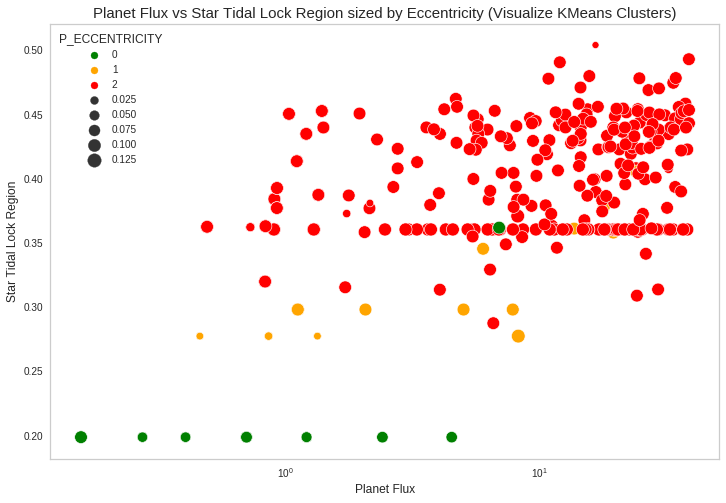

In [ ]:
#Visualize clusters: Feature Pair-1
import seaborn as sns
plt.rcParams['axes.facecolor'] = 'white'
plt.figure(figsize=(12,8))
#Planet Flux vs Star Tidal Lock Region 
g =sns.scatterplot(x=working_data_unsup.iloc[:,24], y=working_data_unsup.iloc[:,28],
              hue=cluster_labels,
              data=working_data_unsup, 
              palette=['green','orange','red'], edgecolor='white', size='P_ECCENTRICITY', sizes=(50,200));
g.set(xscale="log");
g.grid(False)
plt.title("Planet Flux vs Star Tidal Lock Region sized by Eccentricity (Visualize KMeans Clusters)", fontsize=15)
plt.xlabel("Planet Flux", fontsize=12)
plt.ylabel("Star Tidal Lock Region", fontsize=12)
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

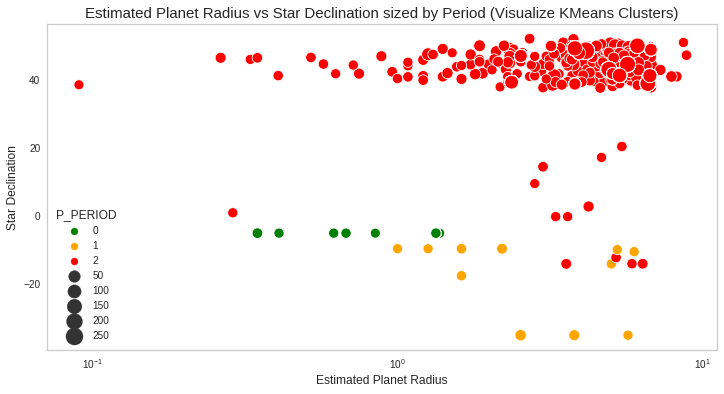

In [ ]:
#Visualize clusters: Feature Pair-2
plt.rcParams['axes.facecolor'] = 'white'
plt.figure(figsize=(12,6))
#Estimated Planet Radius vs Star Declination 
g =sns.scatterplot(x=working_data_unsup.iloc[:,35], y=working_data_unsup.iloc[:,12],
              hue=cluster_labels,
              data=working_data_unsup, 
              palette=['green','orange','red'], size='P_PERIOD', sizes=(100,300));
g.set(xscale="log");
g.grid(False)
plt.title("Estimated Planet Radius vs Star Declination sized by Period (Visualize KMeans Clusters)", fontsize=15)
plt.xlabel("Estimated Planet Radius", fontsize=12)
plt.ylabel("Star Declination", fontsize=12)
plt.rcParams['axes.facecolor'] = 'white'
plt.show()